In [ ]:
import random
import numpy as np

def generate_random_set(num_elements):
    universe = list(range(1, num_elements + 1))
    universe_real = universe
    subsets = []

    for i in range(num_elements**2):
      val = random.choices(universe,k=int(random.uniform(1,num_elements//2)))
      if val not in subsets:
        subsets.append(val)

    return universe,subsets

# Example usage:
num_elements = 10

universe, subsets = generate_random_set(num_elements)

print("Generated Universe:", universe)
print("Generated Subsets:", sorted(subsets))


Generated Universe: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Generated Subsets: [[1], [1, 1], [1, 2, 3], [1, 2, 8, 1], [1, 3], [1, 4, 7, 9], [1, 5], [1, 6, 7, 9], [1, 8], [2], [2, 2], [2, 3, 1], [2, 3, 6, 5], [2, 4, 3], [2, 6, 4], [2, 7, 8], [2, 10, 5], [3], [3, 2], [3, 4], [3, 5, 8], [3, 6], [3, 7], [3, 7, 1], [3, 7, 8, 4], [3, 7, 9], [4], [4, 2], [4, 3], [4, 5], [4, 9, 3, 9], [5], [5, 1, 7, 6], [5, 5, 2, 2], [5, 9], [5, 9, 10], [6], [6, 1, 6, 1], [6, 3, 4, 3], [6, 4, 2], [6, 5, 9, 3], [6, 6, 10, 3], [6, 9, 8], [7], [7, 1, 9, 10], [7, 3], [7, 3, 5, 3], [7, 3, 7, 8], [7, 8, 9], [7, 10, 3], [7, 10, 6], [7, 10, 10, 10], [8], [8, 5], [8, 5, 3, 5], [8, 6, 2, 3], [8, 9], [9, 1, 10, 10], [9, 3], [9, 4], [9, 4, 6], [9, 5, 2, 7], [9, 7, 2, 10], [9, 8, 1, 3], [9, 8, 7], [9, 9, 5, 10], [9, 9, 10, 1], [9, 10], [10], [10, 3, 6], [10, 3, 7], [10, 5, 9, 1], [10, 6], [10, 8], [10, 9], [10, 9, 9], [10, 10]]


In [ ]:
def findUniverseSet(universe,array):
  org_array = array[:]
  universe_len = len(universe)
  universe_base = universe[:]
  array = sorted(array)
  set_values = []
  values = []

  iter = 0
  max_sum = sum(universe_base) / len(universe_base)

  for _ in range(100000):
    if _ % 100 == 0 and len(values) > 3:
      temp_array = [el for el in universe_base if el not in values]
      if len(temp_array) != 0:
        max_sum = min(temp_array)
      else:
        return set_values


    arr_el = [i for i in array[iter] if i not in values]
    x = sum(arr_el)
    if x >= max_sum:
      max_sum = x
      values.extend(array[iter])
      if set(values) == universe_base:
        return set_values

      set_values.append(array[iter])
      array.remove(array[iter])

    iter += 1
    if len(array) == 0:
      return set_values
    iter = iter % len(array)


    universe = [i for i in universe if i not in values]

    if sorted(values) == sorted(universe_base):
      print('EQUAL')
      return set_values
  print('ITERATION OVER')
  return set_values






In [ ]:
def maxMinAlgo(universe,array):
  added_values = []
  sum_values = sum(universe)
  maxScore = 0
  values = []
  for el in universe:
    for subset in array:
      if el in subset:
        remaining_vals = [val for val in subset if val in universe]
        max_Value = max(remaining_vals)
        min_value = min(remaining_vals)
        if len(values) > 0:
          sum_values = sum(remaining_vals)
          if sum_values == 0:
            return added_values
        remainder_vals = min([val for val in universe if val not in values])
        if max_Value > remainder_vals:
          added_values.append(subset)
          values = list(values)
          values.extend(subset)
          values = set(values)
          added_values = [subset for subset in added_values if not any(min_value < el for val in subset)]




        equal_ratio = len(set(universe).intersection(set(values))) / len(universe)

        if equal_ratio >= 1:
          return added_values

    return added_values


universe, subsets = generate_random_set(num_elements)
maxMinAlgo(universe,subsets)


[[1, 5, 3, 7], [1, 6, 4, 4], [3, 8, 1, 2], [10, 3, 1]]

In [ ]:
def backtrack_set_cover(universe, subsets):
    def backtrack(selected_subsets, remaining_elements):
        if not remaining_elements:
            return selected_subsets

        for subset in subsets:
            if any(element in remaining_elements for element in subset):
                result = backtrack(selected_subsets + [subset], [el for el in remaining_elements if el not in subset])
                if result:
                    return result

        return []

    return backtrack([], universe)

# Example usage:
universe = [1, 2, 3, 4, 5]
subsets = [[1, 2], [2, 3], [3, 4], [3, 4, 5]]
result = backtrack_set_cover(universe, subsets)
print(result)


[[1, 2], [2, 3], [3, 4], [3, 4, 5]]


In [664]:
def set_cover_greedy(universe, subsets):
    elements = set(universe)
    selected_subsets = []

    for i in range(10000):
        if not elements:
            break

        best_subset = max(subsets, key=lambda s: len(set(s) & elements))
        selected_subsets.append(best_subset)
        elements.difference_update(best_subset)

    return selected_subsets

# Example usage:
universe = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
subsets = [[1, 2, 3], [4, 5, 6], [7, 8, 9, 10]]

result = set_cover_greedy(universe, subsets)
print("Selected Subsets:", result)


Selected Subsets: [[7, 8, 9, 10], [1, 2, 3], [4, 5, 6]]


In [665]:
def countValueSet(universe, subsets):
    count_dic = {}
    subset_chosen = []

    for array in subsets:
        array_score = 0

        for el in array:
            if el not in count_dic:
                count_dic[el] = 0

            count_dic[el] += 1
            array_score += count_dic[el]

        if array_score / len(array) <= 1.5 and array not in subset_chosen:
            subset_chosen.append(array)
        else:
          for el in array:
            count_dic[el] -= 1


    # Check if all elements in the universe are covered
    limit = len([key for key in count_dic if count_dic[key] > 0]) == len(universe)
    if limit:
        return subset_chosen

    return []

# Example usage:
universe = [1, 2, 3, 4, 5]
subsets = [[1, 2, 3], [3, 4, 5], [1, 2, 4]]

result = countValueSet(universe, subsets)
print(result)


[[1, 2, 3], [3, 4, 5]]


In [ ]:
# Example usage:
num_elements = 10
max_subset_size = 5

# Example usage:
num_elements = 10
max_subset_size = 5

universe, subsets = generate_random_set(num_elements)

print("Generated Universe:", universe)
print("Generated Subsets:", subsets)

print(findUniverseSet(universe,subsets))
print(backtrack_set_cover(universe,subsets))
print(maxMinAlgo(universe,subsets))
print(set_cover_greedy(universe,subsets))
print(countValueSet(universe,subsets))

Generated Universe: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Generated Subsets: [[10], [2, 7, 5, 3], [7, 8, 1], [9, 4, 9, 2], [6], [2, 4], [9], [4, 9, 2], [7, 4, 8, 9], [7, 5, 8], [1], [2, 4, 2], [2, 9, 5], [6, 1, 1, 3], [10, 8, 10], [8, 2, 2, 9], [2, 6, 5], [2], [6, 5, 2], [8], [5], [2, 6, 1], [6, 7, 8, 6], [7, 1, 7], [5, 5, 6], [4], [5, 7, 3], [8, 7, 9], [8, 6, 6], [7], [10, 9, 1], [3, 3, 5], [9, 7], [7, 3, 8, 10], [1, 6], [6, 4, 7], [4, 1], [4, 9, 5, 8], [9, 5, 6, 9], [5, 1, 10, 8], [6, 2, 6, 4], [5, 8, 7], [4, 4], [1, 4, 4, 7], [7, 10], [4, 7, 9], [3, 10, 5, 10], [3, 8, 3, 6], [9, 7, 1, 5], [4, 8, 3], [1, 5, 10, 5], [7, 9], [3, 6], [7, 1], [2, 10, 1, 3], [5, 9, 1, 1], [9, 3, 8], [8, 2, 7], [7, 7, 7], [2, 10, 5, 1], [2, 1, 10], [7, 8, 10], [3, 5, 6, 5], [4, 5, 3], [9, 10, 1, 1], [6, 7], [10, 7, 7, 8], [6, 3, 10, 5], [7, 7, 9, 9], [1, 7], [4, 7, 5, 2], [2, 9, 8, 2], [4, 7, 7, 2], [4, 5], [4, 3, 9, 1], [1, 2, 2], [10, 3, 4, 3], [9, 8]]
[[1, 4, 4, 7], [2, 9, 5], [3, 8, 3, 6], [10, 8, 10]]
[[10]

In [ ]:
import random

def generate_hard_set_cover_instance(universe_size, subset_count, max_subset_size):
    universe = [int(random.uniform(0,100)) for i in range(universe_size)]
    subsets = []

    # Generate subsets with random overlaps
    for _ in range(subset_count):
        subset_size = random.randint(1, min(max_subset_size, len(universe)))
        subset = random.sample(universe, subset_size)
        subsets.append(set(subset))

    return universe, subsets

# Example usage:
universe_size = 100
subset_count = 20
max_subset_size = 10

universe, subsets = generate_hard_set_cover_instance(universe_size, subset_count, max_subset_size)
print("Universe:", universe)
print("Subsets:", subsets)


Universe: [81, 55, 12, 26, 48, 93, 9, 67, 8, 71, 74, 21, 38, 56, 62, 49, 43, 21, 50, 15, 44, 51, 95, 11, 74, 69, 10, 48, 7, 72, 99, 4, 81, 59, 85, 14, 91, 8, 29, 84, 36, 92, 5, 50, 46, 8, 5, 84, 57, 79, 0, 97, 52, 14, 33, 55, 11, 98, 70, 49, 26, 92, 43, 73, 43, 96, 39, 57, 92, 7, 35, 73, 9, 37, 80, 29, 27, 99, 42, 49, 46, 4, 72, 19, 7, 50, 32, 67, 27, 71, 28, 98, 98, 12, 42, 66, 4, 32, 76, 25]
Subsets: [{7, 71, 15, 48, 50, 93}, {8}, {98, 72, 43, 51, 55, 91, 92, 95}, {32, 98, 5, 71, 42, 12, 79, 48, 52}, {50, 7}, {32, 35, 70, 71, 8, 76, 49}, {66, 43, 85, 14}, {5, 71, 43, 48, 49, 55, 56}, {27}, {97, 67, 71, 8, 79, 50, 51, 84, 93}, {98, 4, 74, 15, 84, 55, 92}, {96, 67, 76, 79, 55, 56}, {11, 49, 10, 43}, {96, 0, 71, 55, 25, 26}, {67, 70, 8, 49, 50, 55, 57}, {8, 73}, {49, 10, 67, 84}, {99, 8, 19}, {97, 37, 8, 43, 12, 84, 29, 62}, {32, 74, 15, 51, 84, 29}]


In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

sizes = []
greedy_algo_times = []
maxVal_times = []
backstrack_algo_times = []
maxMinAlgo_times = []
countValueSet_times = []
for _ in range(100,1000):
    # Example usage:
    num_elements = _ / 20
    universe_size = _
    max_subset_size = int(_ / 4)



    universe, subsets = generate_hard_set_cover_instance(universe_size, subset_count, max_subset_size)
    evalVal = [item for sublist in subsets for item in sublist]
    print(evalVal)

    start_time = time.time()
    result1 = set_cover_greedy(universe, subsets)
    greedy_set_time = time.time() - start_time

    start_time = time.time()
    result2 = findUniverseSet(universe, subsets)
    maxVal_time = time.time() - start_time

    # start_time = time.time()
    # result3 = backtrack_set_cover(universe, subsets)
    # backstrack_algo_time = time.time() - start_time

    start_time = time.time()
    result4 = maxMinAlgo(universe, subsets)
    maxMinAlgo_time = time.time() - start_time

    start_time = time.time()
    result5= countValueSet(universe, subsets)
    countValueSet_time = time.time() - start_time

    print(len(result1),len(result2),len(result3),len(result4),len(result5))
    set_values = [set(subset) for subset in result1]  # Replace result1 with your actual variable
    intersection1 = set().union(*set_values) & set(evalVal)
    intersection2 = set().union(*set_values) & set(universe)
    equal_ratio = len(intersection1) / len(intersection2)
    print(equal_ratio)

    set_values = [set(subset) for subset in result2]  # Replace result1 with your actual variable
    intersection1 = set().union(*set_values) & set(evalVal)
    intersection2 = set().union(*set_values) & set(universe)
    equal_ratio = len(intersection1) / len(intersection2)
    print(equal_ratio)

    set_values = [set(subset) for subset in result3]  # Replace result1 with your actual variable
    intersection1 = set().union(*set_values) & set(evalVal)
    intersection2 = set().union(*set_values) & set(universe)
    equal_ratio = len(intersection1) / len(intersection2)
    print(equal_ratio)

    set_values = [set(subset) for subset in result4]  # Replace result1 with your actual variable
    intersection1 = set().union(*set_values) & set(evalVal)
    intersection2 = set().union(*set_values) & set(universe)
    equal_ratio = len(intersection1) / (len(intersection2)+1)
    print(equal_ratio)

    set_values = [set(subset) for subset in result5]  # Replace result1 with your actual variable
    intersection1 = set().union(*set_values) & set(evalVal)
    intersection2 = set().union(*set_values) & set(universe)
    equal_ratio = len(intersection1) / (len(intersection2) +1)
    print(equal_ratio)

    sizes.append(_)
    greedy_algo_times.append(greedy_set_time)
    maxVal_times.append(maxVal_time)
    backstrack_algo_times.append(backstrack_algo_time)
    maxMinAlgo_times.append(maxMinAlgo_time)
    countValueSet_times.append(countValueSet_time)

[65, 97, 35, 38, 7, 72, 11, 17, 18, 83, 56, 26, 61, 0, 3, 12, 17, 30, 35, 36, 37, 38, 41, 43, 44, 45, 50, 53, 63, 64, 65, 68, 71, 72, 74, 0, 2, 6, 17, 18, 19, 27, 35, 38, 43, 48, 55, 63, 65, 67, 71, 74, 80, 82, 86, 87, 97, 98, 32, 98, 99, 36, 68, 35, 71, 72, 43, 80, 83, 22, 87, 90, 28, 3, 68, 5, 70, 7, 48, 80, 90, 29, 0, 67, 6, 45, 50, 83, 88, 26, 0, 7, 10, 12, 16, 19, 22, 32, 37, 38, 41, 42, 43, 53, 55, 56, 70, 71, 72, 74, 83, 86, 93, 67, 68, 38, 71, 43, 16, 18, 19, 86, 55, 28, 30, 0, 66, 70, 38, 10, 42, 43, 78, 48, 18, 83, 52, 21, 29, 93, 28, 61, 97, 35, 68, 42, 16, 0, 3, 6, 10, 16, 18, 23, 28, 29, 32, 35, 43, 61, 66, 67, 70, 71, 74, 87, 93, 3, 10, 16, 21, 35, 39, 44, 48, 53, 55, 61, 66, 68, 71, 72, 73, 77, 88, 97, 65, 98, 68, 36, 7, 44, 16, 82, 52, 0, 98, 99, 70, 7, 72, 38, 42, 77, 48, 17, 52, 24, 28, 97, 98, 66, 36, 6, 72, 73, 41, 43, 80, 50, 18, 24, 0, 3, 11, 12, 25, 26, 29, 35, 42, 43, 44, 50, 55, 63, 64, 65, 66, 72, 82, 83, 86, 0, 73, 32, 30, 64, 35, 36, 68, 38, 6, 72, 17, 53, 2

KeyboardInterrupt: 

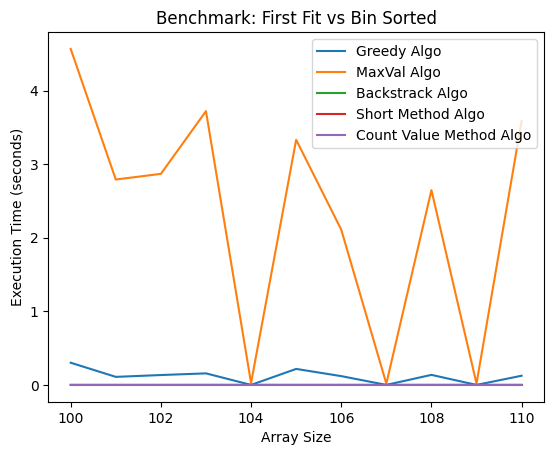

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, greedy_algo_times, label='Greedy Algo')
plt.plot(sizes, maxVal_times, label='MaxVal Algo')
plt.plot(sizes, backstrack_algo_times, label='Backstrack Algo')
plt.plot(sizes, maxMinAlgo_times, label='Short Method Algo')
plt.plot(sizes, countValueSet_times, label='Count Value Method Algo')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()

In [ ]:
import time
import matplotlib.pyplot as plt

sizes = []
greedy_algo_results = []
maxVal_results = []
backstrack_algo_results = []
for _ in range(2,100):
    # Example usage:
    num_elements = _+10
    max_subset_size = _+20

    universe, subsets = generate_random_set(num_elements, max_subset_size)

    start_time = time.time()
    result1 = set_cover_greedy(universe, subsets)
    greedy_set_time = time.time() - start_time

    start_time = time.time()
    result2 = findUniverseSet(universe, subsets)
    maxVal_time = time.time() - start_time

    start_time = time.time()
    result3 = backtrack_set_cover(universe, subsets)
    backstrack_algo_time = time.time() - start_time



    print(len(result),len(result2),len(result3))

    sizes.append(_)
    greedy_algo_results.append(len(result1))
    maxVal_results.append(len(result2))
    backstrack_algo_results.append(len(result3))

3 5 4


KeyboardInterrupt: 

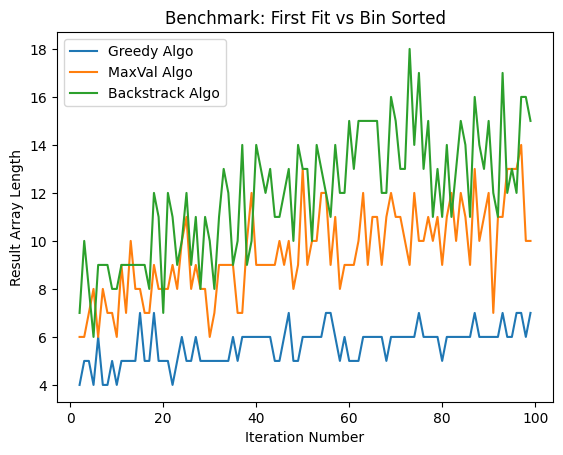

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, greedy_algo_results, label='Greedy Algo')
plt.plot(sizes, maxVal_results, label='MaxVal Algo')
plt.plot(sizes, backstrack_algo_results, label='Backstrack Algo')
plt.xlabel('Iteration Number')
plt.ylabel('Result Array Length')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()

In [ ]:
import time
import matplotlib.pyplot as plt

sizes = []
greedy_algo_times = []
maxVal_times = []
backstrack_algo_times = []
for _ in range(2,1000):
    # Example usage:
    num_elements = _+10
    max_subset_size = _+5
    print(_)

    universe, subsets = generate_random_set(num_elements, max_subset_size)


    start_time = time.time()
    result2 = findUniverseSet(universe, subsets)
    maxVal_time = time.time() - start_time

    start_time = time.time()
    result3 = backtrack_set_cover(universe, subsets)
    backstrack_algo_time = time.time() - start_time


    sizes.append(_)
    maxVal_times.append(maxVal_time)
    backstrack_algo_times.append(backstrack_algo_time)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271


KeyboardInterrupt: 

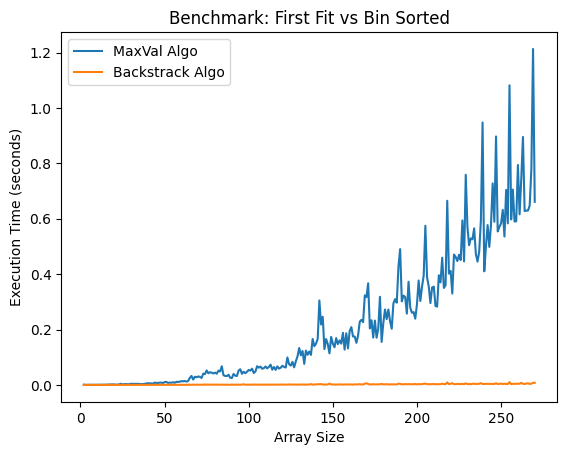

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, maxVal_times, label='MaxVal Algo')
plt.plot(sizes, backstrack_algo_times, label='Backstrack Algo')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()

In [ ]:
import random

def generate_set_cover_instance(universe_size, subset_count, max_subset_size):
    universe = set(range(1, universe_size + 1))
    subsets = []

    for _ in range(subset_count):
        if len(universe) <= 1:
            break  # Break out of the loop if the universe has insufficient elements
        subset_size = min(random.randint(1, min(max_subset_size, len(universe))), len(universe))
        subset = random.sample(universe, subset_size)
        subsets.append(set(subset))
        universe -= set(subset)

    return universe, subsets

# Example usage:
for _ in range(5):
    universe_size = 100
    subset_count = 8
    max_subset_size = 5

    universe, subsets = generate_set_cover_instance(universe_size, subset_count, max_subset_size)

    print("Universe:", universe)
    print("Subsets:", subsets)
    print()


Universe: {1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 49, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 64, 65, 66, 68, 69, 70, 71, 73, 75, 77, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100}
Subsets: [{74, 28}, {8, 76, 29, 78}, {45}, {96, 72, 6}, {63}, {50, 43}, {52}, {56, 67, 36, 85}]

Universe: {2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 54, 55, 56, 57, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 88, 89, 91, 93, 94, 95, 97, 98, 99, 100}
Subsets: [{59, 90, 83, 71}, {37, 7}, {62}, {96, 8}, {49, 82, 36, 87}, {35}, {1, 28, 53, 14}, {92, 31}]

Universe: {3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 23, 24, 25, 26, 28, 29, 30, 32, 33, 34, 37, 39, 41, 42, 43, 44, 45, 46, 48

<ipython-input-179-2715a8b57eef>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = random.sample(universe, subset_size)


In [ ]:
import time
import matplotlib.pyplot as plt

sizes = []
greedy_algo_times = []
maxVal_times = []
backstrack_algo_times = []
for _ in range(2,1000):
    # Example usage:
    universe_size = 10
    subset_count = int(random.uniform(0,100))
    max_subset_size = 8

    print(_)

    universe, subsets = generate_set_cover_instance(universe_size, subset_count, max_subset_size)

    start_time = time.time()
    result1 = set_cover_greedy(universe, subsets)
    greedy_set_time = time.time() - start_time


    start_time = time.time()
    result2 = findUniverseSet(list(universe), subsets)
    maxVal_time = time.time() - start_time



    start_time = time.time()
    result3 = backtrack_set_cover(universe, subsets)
    backstrack_algo_time = time.time() - start_time


    result_np = [item for sublist in result1 for item in sublist]
    result2_np = [item for sublist in result2 for item in sublist]
    result3_np = [item for sublist in result3 for item in sublist]
    print(sum(np.equal(np.unique(result_np),universe)) / len(universe))
    result2_np_unique = np.unique(result2_np)
    fraction = np.sum(np.isin(result2_np_unique, universe)) / len(universe)
    print(fraction)
    print(sum(np.equal(np.unique(result3_np),universe)) / len(universe))



    print(len(result),len(result2),len(result3))

    sizes.append(_)
    greedy_algo_times.append(greedy_set_time)
    maxVal_times.append(maxVal_time)
    backstrack_algo_times.append(backstrack_algo_time)

2


<ipython-input-179-2715a8b57eef>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = random.sample(universe, subset_size)


ZeroDivisionError: division by zero

In [ ]:
def set_cover_greedy(universe, subsets):
    elements = set(universe)
    selected_subsets = []

    while elements:
        best_subset = max(subsets, key=lambda s: len(set(s) & elements))
        selected_subsets.append(best_subset)
        elements -= set(best_subset)

    return selected_subsets

# Example where greedy algorithm fails
universe = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
subsets = [{1, 2, 3, 4}, {5, 6, 7, 8}, {9, 10}]

result = set_cover_greedy(universe, subsets)
print("Greedy Solution:", result)


Greedy Solution: [{1, 2, 3, 4}, {8, 5, 6, 7}, {9, 10}]


### New Start

In [696]:
def countValueSet(universe, subsets):
    count_dic = {}
    subset_chosen = []
    val_score = 10**10
    for array in subsets:
        array_score = 0

        for el in array:
            count_dic.setdefault(el, 0)
            count_dic[el] += 1
            array_score += count_dic[el]

        if array_score / len(array) < val_score and array not in subset_chosen:
            subset_chosen.append(array)
        else:
            for el in array:
                count_dic[el] -= 1

    # Check if all elements in the universe are covered
    limit = all(count_dic[key] > 0 for key in count_dic)
    if limit:
        return subset_chosen

    return []

# Example usage:
universe = [1, 2, 3, 4, 5]
subsets = [[1, 2, 3], [3, 4, 5], [1, 2, 4]]

result = countValueSet(universe, subsets)
print(result)


[[1, 2, 3], [3, 4, 5], [1, 2, 4]]


In [714]:
selNum = 10000
num_elements = selNum / 3
universe_size = selNum
max_subset_size = int(selNum /3)



universe, subsets = generate_hard_set_cover_instance(universe_size, subset_count, max_subset_size)
evalVal = [item for sublist in subsets for item in sublist]


result1 = countValueSet(universe,subsets)
result2 = set_cover_greedy(universe, subsets)
result3 = findUniverseSet(universe, subsets)
print(len(result1),len(result2),len(result3),len(subsets))


set_values = [set(subset) for subset in result1]  # Replace result1 with your actual variable
intersection1 = set().union(*set_values) & set(evalVal)
intersection2 = set().union(*set_values) & set(universe)
equal_ratio = len(intersection1) / len(intersection2)
print(equal_ratio)

set_values = [set(subset) for subset in result2]  # Replace result1 with your actual variable
intersection1 = set().union(*set_values) & set(evalVal)
intersection2 = set().union(*set_values) & set(universe)
equal_ratio = len(intersection1) / len(intersection2)
print(equal_ratio)


set_values = [set(subset) for subset in result3]  # Replace result1 with your actual variable
intersection1 = set().union(*set_values) & set(evalVal)
intersection2 = set().union(*set_values) & set(universe)
equal_ratio = len(intersection1) / len(intersection2)
print(equal_ratio)




3 1 2 20
1.0
1.0
1.0


In [663]:
result2

[{3, 7, 27, 50, 53, 54, 60, 62, 67, 75},
 {3, 6, 33, 38, 51, 53, 68, 78, 81, 99},
 {20, 21, 25, 27, 62, 71, 76, 80, 94},
 {1, 7, 11, 31, 32, 81, 93, 96},
 {3, 13, 42, 53, 72, 80, 82, 96},
 {0, 9, 44, 61, 62, 78},
 {43, 56, 61, 75},
 {6, 88},
 {50, 90},
 {21, 29},
 {20, 45, 61, 75},
 {20, 22, 76},
 {28, 31, 42, 62, 94, 96},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27, 53},
 {27